## Trajactory Analysis:

#### Skrypt powstał w celu analizy danych pochodzących z programu Fiji, wygenerowanych za pomocą pluginu TrackMate. Dane opisuja ścieżki ruchu chloroplastów w komórkach roślinnych. Dane zostały wstępnie przefiltrowane w programie Fiji. 

#### The scrip was created to analyze the data from the Fiji program, data are generated with the TrackMate plugin. The data describe the pathways of chloroplast movement in plant cells. The data has been pre-filtered in the Fiji program. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# allow us to see results under cell code
%matplotlib inline

### Importing raw data produced from Fiji and preparing them for the next steps:

In [2]:
# Checking the encoding of file:
with open('export_tracks_analiza_filtered.csv') as f:
    print(f)

<_io.TextIOWrapper name='export_tracks_analiza_filtered.csv' mode='r' encoding='cp1250'>


In [3]:
raw_data = pd.read_csv('export_tracks_analiza_filtered.csv', encoding='cp1250')
raw_data.shape # n instances n attribiutes in data_set

(82, 28)

In [4]:
# checking how data looks:
raw_data.head()

,LABEL,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
0,Label,Track index,Track ID,Number of spots in track,Number of gaps,Number of split events,Number of merge events,Number of complex points,Longest gap,Track duration,...,Track min speed,Track median speed,Track std speed,Track mean quality,Total distance traveled,Max distance traveled,Confinement ratio,Mean straight line speed,Linearity of forward progression,Mean directional change rate
1,Label,Index,ID,N spots,N gaps,N splits,N merges,N complex,Lgst gap,Duration,...,Min speed,Med. speed,Std speed,Mean Q,Total dist.,Max dist.,Cfn. ratio,Mn. v. line,Fwd. progr.,Mn. ? rate
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(frame),...,(µm/frame),(µm/frame),(µm/frame),(quality),(µm),(µm),NaN,(µm/frame),NaN,(rad/frame)
3,Track_0,0,0,203,0,0,0,0,0,202.0,...,0.012537775990873414,0.19625171500944194,0.17337951796884685,0.8303476601398637,47.573271416602005,3.0097871678048858,0.0632663484805995,0.014899936474281613,0.06326634848059955,2.0637001384910536
4,Track_2,2,2,329,0,0,0,0,0,328.0,...,0.011041753390749896,0.24221536161148566,0.17236745756311742,0.8437915094717657,89.30716219242181,6.885623900630261,0.07081013586849495,0.019280037466082638,0.07081013586849498,2.0399389011350326


In [5]:
# Checking the information about loaded df:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   LABEL                             81 non-null     object
 1   TRACK_INDEX                       81 non-null     object
 2   TRACK_ID                          81 non-null     object
 3   NUMBER_SPOTS                      81 non-null     object
 4   NUMBER_GAPS                       81 non-null     object
 5   NUMBER_SPLITS                     81 non-null     object
 6   NUMBER_MERGES                     81 non-null     object
 7   NUMBER_COMPLEX                    81 non-null     object
 8   LONGEST_GAP                       81 non-null     object
 9   TRACK_DURATION                    82 non-null     object
 10  TRACK_START                       82 non-null     object
 11  TRACK_STOP                        82 non-null     object
 12  TRACK_DISPLACEMENT      

In [6]:
# Checking how many null values are in loaded data:
raw_data.isnull().sum()

LABEL                               1
TRACK_INDEX                         1
TRACK_ID                            1
NUMBER_SPOTS                        1
NUMBER_GAPS                         1
NUMBER_SPLITS                       1
NUMBER_MERGES                       1
NUMBER_COMPLEX                      1
LONGEST_GAP                         1
TRACK_DURATION                      0
TRACK_START                         0
TRACK_STOP                          0
TRACK_DISPLACEMENT                  0
TRACK_X_LOCATION                    0
TRACK_Y_LOCATION                    0
TRACK_Z_LOCATION                    0
TRACK_MEAN_SPEED                    0
TRACK_MAX_SPEED                     0
TRACK_MIN_SPEED                     0
TRACK_MEDIAN_SPEED                  0
TRACK_STD_SPEED                     0
TRACK_MEAN_QUALITY                  0
TOTAL_DISTANCE_TRAVELED             0
MAX_DISTANCE_TRAVELED               0
CONFINEMENT_RATIO                   1
MEAN_STRAIGHT_LINE_SPEED            0
LINEARITY_OF

In [7]:
# replacing NaN values to zeroes in all dataset:
raw_data.fillna(0)

,LABEL,TRACK_INDEX,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,LONGEST_GAP,TRACK_DURATION,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TOTAL_DISTANCE_TRAVELED,MAX_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
0,Label,Track index,Track ID,Number of spots in track,Number of gaps,Number of split events,Number of merge events,Number of complex points,Longest gap,Track duration,...,Track min speed,Track median speed,Track std speed,Track mean quality,Total distance traveled,Max distance traveled,Confinement ratio,Mean straight line speed,Linearity of forward progression,Mean directional change rate
1,Label,Index,ID,N spots,N gaps,N splits,N merges,N complex,Lgst gap,Duration,...,Min speed,Med. speed,Std speed,Mean Q,Total dist.,Max dist.,Cfn. ratio,Mn. v. line,Fwd. progr.,Mn. ? rate
2,0,0,0,0,0,0,0,0,0,(frame),...,(µm/frame),(µm/frame),(µm/frame),(quality),(µm),(µm),0,(µm/frame),0,(rad/frame)
3,Track_0,0,0,203,0,0,0,0,0,202.0,...,0.012537775990873414,0.19625171500944194,0.17337951796884685,0.8303476601398637,47.573271416602005,3.0097871678048858,0.0632663484805995,0.014899936474281613,0.06326634848059955,2.0637001384910536
4,Track_2,2,2,329,0,0,0,0,0,328.0,...,0.011041753390749896,0.24221536161148566,0.17236745756311742,0.8437915094717657,89.30716219242181,6.885623900630261,0.07081013586849495,0.019280037466082638,0.07081013586849498,2.0399389011350326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Track_1019,1019,1019,168,0,0,0,0,0,167.0,...,9.252752483949699E-4,0.2640965564727253,0.2534179053530433,0.8443609348365239,53.03465543961965,3.784737998158841,0.06914773000189017,0.02195943733582093,0.06914773000189013,2.0629497929447926
78,Track_1187,1187,1187,130,0,0,0,0,0,129.0,...,0.009966561937287684,0.33580404536098424,0.18561391451879605,0.807503448999845,46.442056092723654,4.66639889925376,0.09754529321212878,0.035117860301851635,0.0975452932121288,2.0934799986134247
79,Track_1324,1324,1324,149,0,0,0,0,0,148.0,...,0.014413134786854593,0.23409933895176338,0.13813947389997266,0.8207009794728067,39.21422922586545,2.0137780072391958,0.04105320034708261,0.010877497357201869,0.04105320034708255,1.9255128116711568
80,Track_1327,1327,1327,148,0,0,0,0,0,147.0,...,0.0112759348866068,0.22313422413919243,0.21181297521853848,0.8363646675606031,40.71078071229293,2.269726752071863,0.05439110219550962,0.015063294110076916,0.0543911021955096,2.159275841445982


In [8]:
# Creating another df with columns used in firthere analysis:
df_from_raw = raw_data[['LABEL', 'TRACK_MIN_SPEED', 'TRACK_MEDIAN_SPEED',
                          'TRACK_STD_SPEED', 'TOTAL_DISTANCE_TRAVELED',
                          'CONFINEMENT_RATIO', 'MEAN_STRAIGHT_LINE_SPEED',
                          'LINEARITY_OF_FORWARD_PROGRESSION',
                          'MEAN_DIRECTIONAL_CHANGE_RATE']].copy()

In [9]:
# Droping rows containing descriptive infomration about data:
df_dropped_rows = df_from_raw.drop(df_from_raw.index[[0,1,2]])

In [10]:
# Replacing all dots into commas in df:
df_dropped_rows.apply(lambda x: x.str.replace('.',','))

,LABEL,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TOTAL_DISTANCE_TRAVELED,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE
3,Track_0,"0,012537775990873414","0,19625171500944194","0,17337951796884685","47,573271416602005","0,0632663484805995","0,014899936474281613","0,06326634848059955","2,0637001384910536"
4,Track_2,"0,011041753390749896","0,24221536161148566","0,17236745756311742","89,30716219242181","0,07081013586849495","0,019280037466082638","0,07081013586849498","2,0399389011350326"
5,Track_7,"0,02168057265315884","0,43230510933621885","0,32018762954402163","35,80106355661149","0,03544778205280692","0,01714957159747909","0,035447782052806916","2,043704656756583"
6,Track_9,"0,022944196707414117","0,25008146794845026","0,1449029487600466","45,9958898635749","0,04661142743746941","0,012686000489928144","0,04661142743746944","2,002667336189909"
7,Track_10,"0,034500336066499424","0,24994408761385586","0,15797736786823552","55,03145054391526","0,01736187705397379","0,004825501406289372","0,01736187705397379","2,0793234061281254"
...,...,...,...,...,...,...,...,...,...
77,Track_1019,"9,252752483949699E-4","0,2640965564727253","0,2534179053530433","53,03465543961965","0,06914773000189017","0,02195943733582093","0,06914773000189013","2,0629497929447926"
78,Track_1187,"0,009966561937287684","0,33580404536098424","0,18561391451879605","46,442056092723654","0,09754529321212878","0,035117860301851635","0,0975452932121288","2,0934799986134247"
79,Track_1324,"0,014413134786854593","0,23409933895176338","0,13813947389997266","39,21422922586545","0,04105320034708261","0,010877497357201869","0,04105320034708255","1,9255128116711568"
80,Track_1327,"0,0112759348866068","0,22313422413919243","0,21181297521853848","40,71078071229293","0,05439110219550962","0,015063294110076916","0,0543911021955096","2,159275841445982"


In [11]:
# Setting the proper index order:
df_dropped_rows = df_dropped_rows.reset_index(level=None, drop=True)
# df_dropped_rows

In [16]:
# Changing data types from object to float:
# Changing numerical values first:
df_w_floats = df_dropped_rows.iloc[:, 1:9].astype('float')
# We also adding the label column with the names of tracks changed to string
df_w_floats['LABEL'] = df_dropped_rows['LABEL'].astype('string')
df_w_floats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TRACK_MIN_SPEED                   79 non-null     float64
 1   TRACK_MEDIAN_SPEED                79 non-null     float64
 2   TRACK_STD_SPEED                   79 non-null     float64
 3   TOTAL_DISTANCE_TRAVELED           79 non-null     float64
 4   CONFINEMENT_RATIO                 79 non-null     float64
 5   MEAN_STRAIGHT_LINE_SPEED          79 non-null     float64
 6   LINEARITY_OF_FORWARD_PROGRESSION  79 non-null     float64
 7   MEAN_DIRECTIONAL_CHANGE_RATE      79 non-null     float64
 8   LABEL                             79 non-null     string 
dtypes: float64(8), string(1)
memory usage: 5.7 KB


In [20]:
# Making subset of only numeric values without the labels:
df_wo_labels = df_w_floats.copy()
df_wo_labels = df_wo_labels.drop('LABEL', axis=1)
df_wo_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TRACK_MIN_SPEED                   79 non-null     float64
 1   TRACK_MEDIAN_SPEED                79 non-null     float64
 2   TRACK_STD_SPEED                   79 non-null     float64
 3   TOTAL_DISTANCE_TRAVELED           79 non-null     float64
 4   CONFINEMENT_RATIO                 79 non-null     float64
 5   MEAN_STRAIGHT_LINE_SPEED          79 non-null     float64
 6   LINEARITY_OF_FORWARD_PROGRESSION  79 non-null     float64
 7   MEAN_DIRECTIONAL_CHANGE_RATE      79 non-null     float64
dtypes: float64(8)
memory usage: 5.1 KB


### Checking correlation between data:

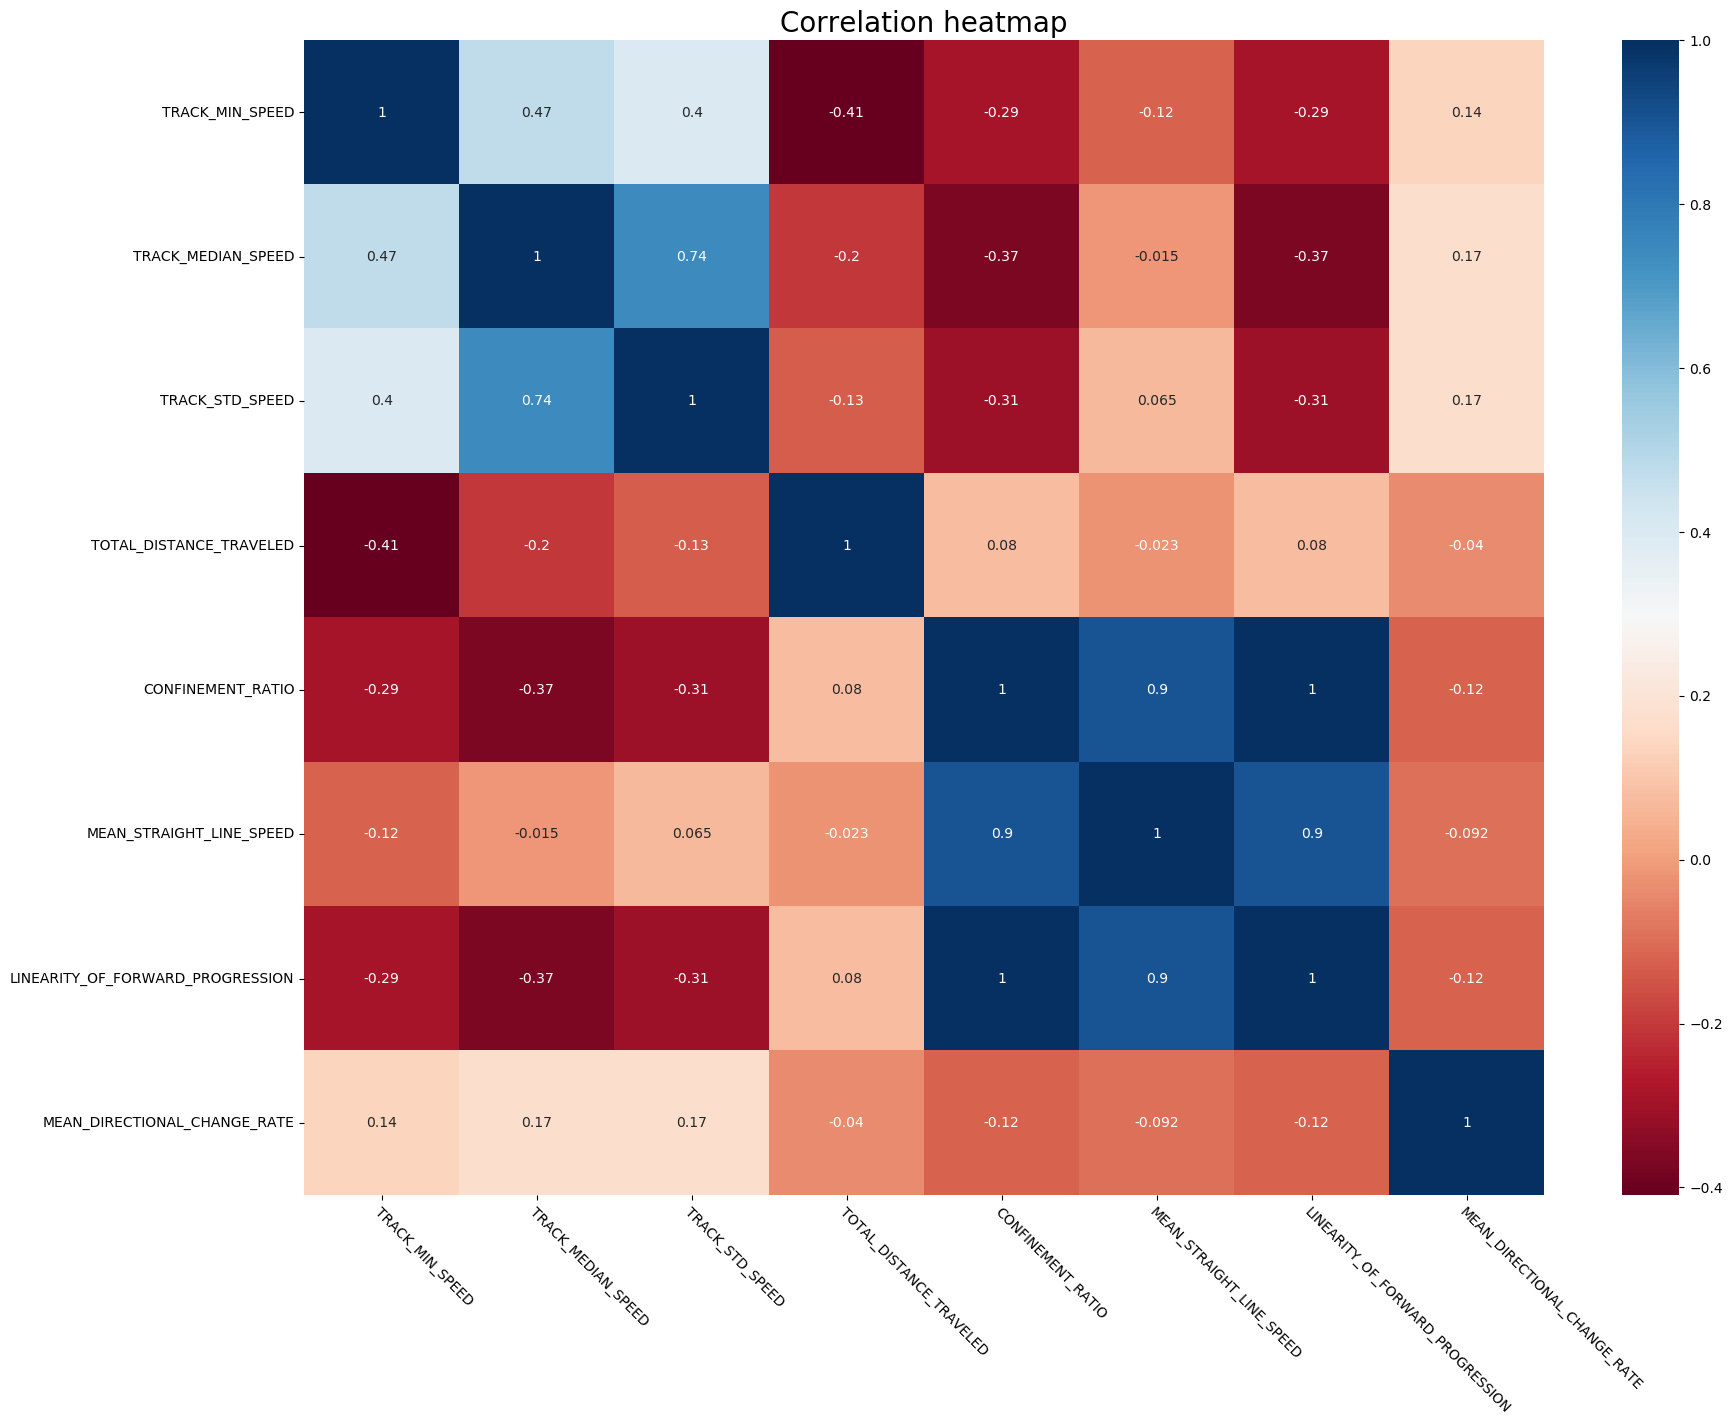

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(df_wo_labels.corr(method='spearman'),
            annot=True, cmap='RdBu')
plt.title('Correlation heatmap', fontsize=20)
plt.yticks(rotation=0)
plt.xticks(rotation=-45, ha='left', rotation_mode='anchor')
plt.show()

### To do:
1. Segmentation
2. heatmap of corelation - in function .corr() spearman corealation can be used
3. check the skewnes of each data, distribution, mean, meadian, mode, make smoe histogram and box plots to look for outliers etc. 
4. maybe look after some regresion analysis of the varaibles which show correlation